In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Step 1: Load Dataset
data = pd.read_csv("Task 4 Dataset - Twitter Sentiment.csv") 
data.columns = data.columns.str.strip()

In [21]:
# Preview dataset
cols = ['id', 'entity', 'sentiment', 'text']
data = pd.read_csv("Task 4 Dataset - Twitter Sentiment.csv", names=cols, header=None)

# Preview
print(data.head())

     id       entity sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [17]:
# Basic info
print("Dataset info:")
data.info()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [23]:
# Check for missing values
print("Missing values:")
print(data.isnull().sum())


Missing values:
id             0
entity         0
sentiment      0
text         686
dtype: int64


Sentiment value counts:
sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


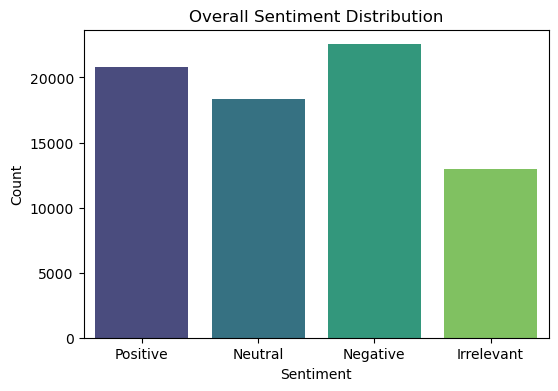

In [25]:
# Step 2: Explore Sentiments
print("Sentiment value counts:")
print(data['sentiment'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(data=data, x='sentiment', palette='viridis')
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

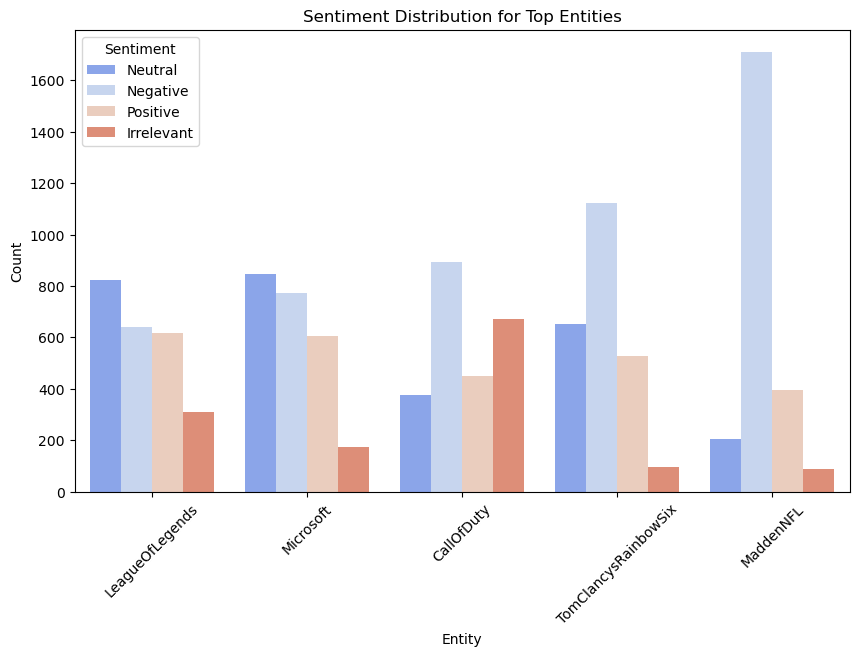

In [27]:
# Step 3: Sentiment Distribution by Entity
top_entities = data['entity'].value_counts().head(5).index
entity_data = data[data['entity'].isin(top_entities)]

plt.figure(figsize=(10,6))
sns.countplot(data=entity_data, x='entity', hue='sentiment', palette='coolwarm')
plt.title("Sentiment Distribution for Top Entities")
plt.xlabel("Entity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

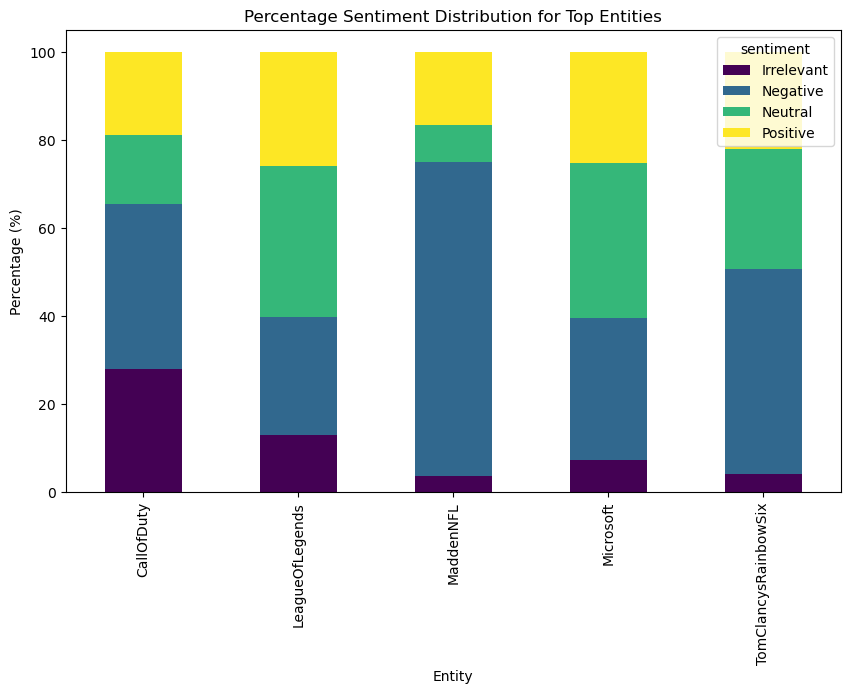

In [29]:
# Step 4: Sentiment Percentage by Entity
entity_sentiment_pct = entity_data.groupby(['entity', 'sentiment']).size().unstack().fillna(0)
entity_sentiment_pct = entity_sentiment_pct.div(entity_sentiment_pct.sum(axis=1), axis=0) * 100

entity_sentiment_pct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title("Percentage Sentiment Distribution for Top Entities")
plt.xlabel("Entity")
plt.ylabel("Percentage (%)")
plt.show()